# Exploratory Data Analysis

#### Data Description

We have records of 30000 customers credit card transaction history for past 6 months, on basis of which we have to predict if the customer will fall under the default or not.

##### Feature Description

- ID : ID of each customer     
- LIMIT_BAL : Amount of given credit in NT dollars    
- SEX : Gender (1 = Male, 2 = Female)   
- Education : (1 = Graduate school, 2 = University, 3 = High school,0,4,5,6=Others)   
- MARRIAGE : Marital status (0 = Others, 1 = Married, 2 = Single, 3 = Others)    
- AGE : Age in years             

Scale for PAY_0 to PAY_6 : (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)         

- PAY_0: Repayment status in September, 2005 (scale same as above)

- PAY_2: Repayment status in August, 2005 (scale same as above)

- PAY_3: Repayment status in July, 2005 (scale same as above)

- PAY_4: Repayment status in June, 2005 (scale same as above)

- PAY_5: Repayment status in May, 2005 (scale same as above)

- PAY_6: Repayment status in April, 2005 (scale same as above)

- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

- default.payment.next.month: Default payment (1=yes, 0=no)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


##### Information about data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

##### Removing unwanted column

In [3]:
df.drop("ID",axis=1, inplace=True)

##### Check for null values

In [4]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [7]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#### Dependent variable

Here, the dependent variable is the column default.payment.next.month, 
with values:
- class 1 : (1 = Yes)    
- class 0 : (0 = No)

In [5]:
#renaming the column for convinience
df["IsDefaulter"] = df["default.payment.next.month"]
df.drop("default.payment.next.month",axis=1,inplace=True)

Countplot for column IsDefaulter

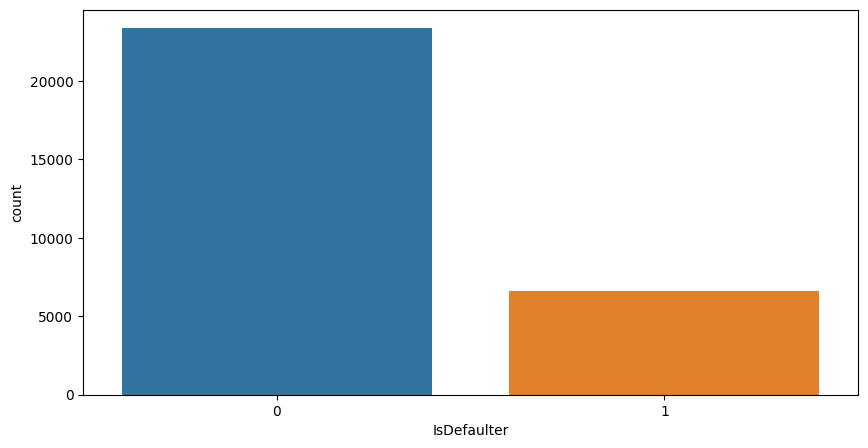

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(x = "IsDefaulter",data=df)
plt.show()

As seen from above graph that the proportion of both classes (0 and 1) present in the dataset is imbalanced.

In [7]:
df["IsDefaulter"].value_counts()

0    23364
1     6636
Name: IsDefaulter, dtype: int64

#### Independent Variables

Our dataset have both Numerical and Categorical features as input.
let's explore them one by one.

Categorical Features

We are going check how the categorical features are related to the target variavle.

$SEX$
- 1 - Male   
- 2 - Female

In [8]:
df["SEX"].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

$EDUCATION$    
- 1 - Graduate school   
- 2 - University  
- 3 - High school  
- 4 - Others

In [9]:
df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

As seen from the dataset that the values like 0, 5 and 6 donot have any description. So we can add up the values of 0,5 and 6 to 4, which is others.

In [10]:
fill = (df["EDUCATION"] == 0) | (df["EDUCATION"] == 5) | (df["EDUCATION"] == 6)
df.loc[fill,"EDUCATION"] = 4
df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

$MARRIAGE$  
- 1 - Married  
- 2 - Single  
- 3 - Others   


In [11]:
df["MARRIAGE"].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

since the value 0 have no description, so we can add it to 3, which is others

In [12]:
fill = df["MARRIAGE"] == 0
df.loc[fill,"MARRIAGE"] = 3
df["MARRIAGE"].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

Plotting our Categorical features with respect to the target variable

In [13]:
categorical_features = ["SEX","EDUCATION","MARRIAGE"]

In [14]:
df_catg = df[categorical_features]
df_catg = pd.concat([df_catg,df["IsDefaulter"]],axis=1)

In [15]:
df_catg.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

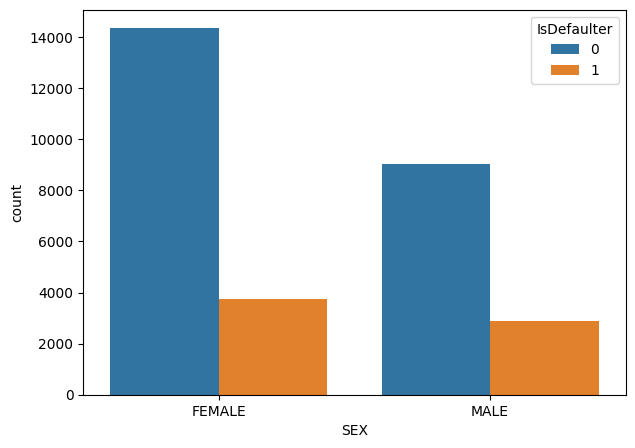

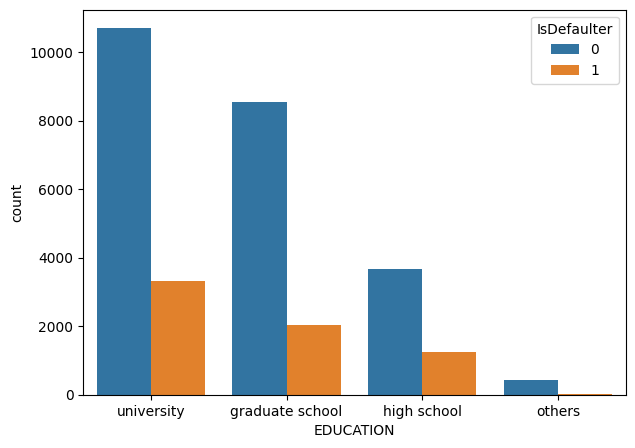

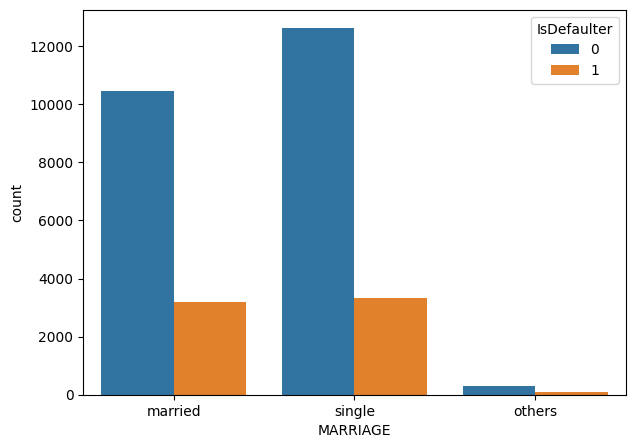

In [16]:
for cat in categorical_features:
    plt.figure(figsize=(7,5))
    sns.countplot(x = cat,data = df_catg, hue="IsDefaulter")
    plt.show()

above observations from the graph show that the categorical features:
- There are more females credit card holder, so number of defaulter have high proportion of females.   
- Number of defaulters have a high proportion of educated people (Graduate school and University).   
- Number of defaulters have a high proportions of Singles.

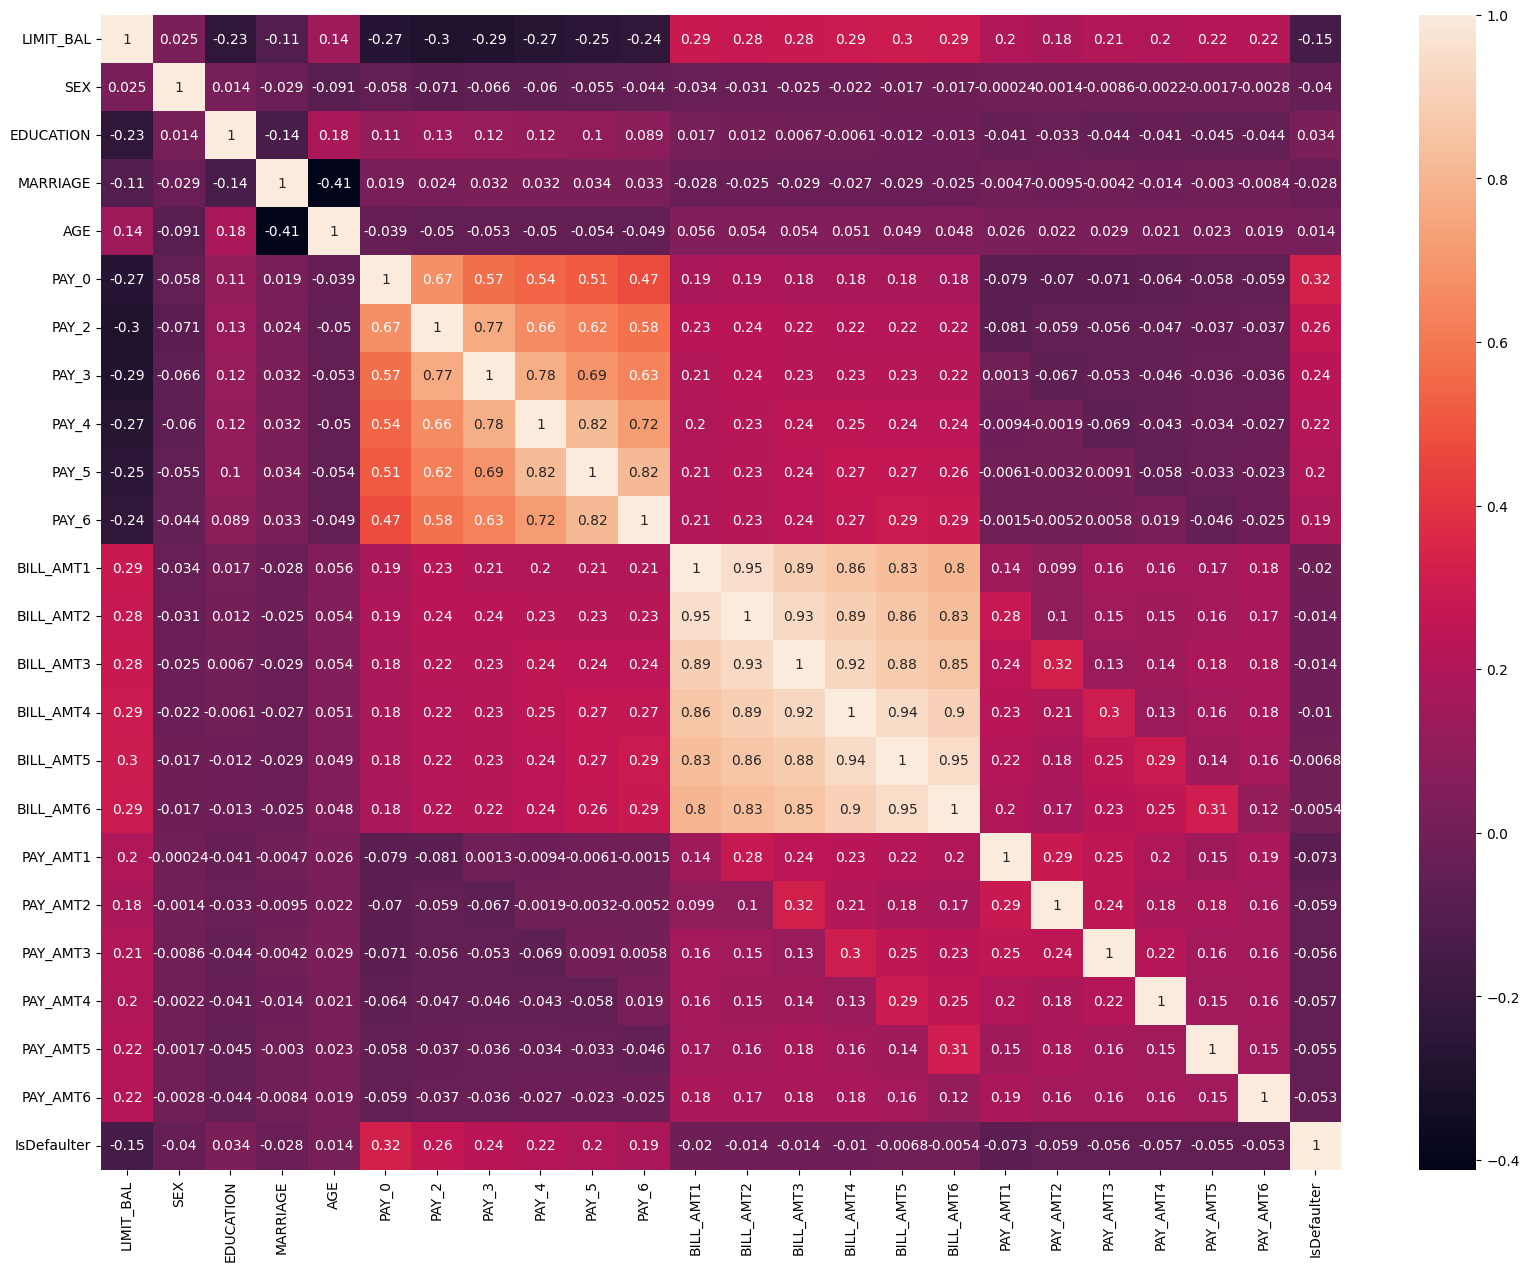

In [17]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

From the above heatmap it is seen that most of the features are correlated with the target variable, so dropping the columns result's in loss of information.
So, we don’t need to drop any column although there is a correlation.

#### As we have seen earlier that we have imbalanced dataset. So to remediate Imbalance we are using SMOTE(Synthetic Minority Oversampling Technique)

In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['IsDefaulter'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [19]:
columns = list(df.columns)
columns.pop()

'IsDefaulter'

In [20]:
balanced_df = pd.DataFrame(x_smote,columns=columns)
balanced_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.000000,2,2,1,24,2,2,-1,-1,-2,...,689.000000,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000
1,120000.000000,2,2,2,26,-1,2,0,0,0,...,2682.000000,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000
2,90000.000000,2,2,2,34,0,0,0,0,0,...,13559.000000,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000
3,50000.000000,2,2,1,37,0,0,0,0,0,...,49291.000000,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000
4,50000.000000,1,2,1,57,-1,0,-1,0,0,...,35835.000000,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,83805.533984,2,2,1,38,0,0,0,0,-1,...,7245.414600,1717.685331,51204.159726,52107.033066,1357.321903,3619.550047,785.329505,51539.807823,1343.554175,6912.950833
46724,120000.000000,1,2,1,33,0,1,0,0,0,...,121797.289546,120779.037062,121681.611475,121479.332813,904.674409,5582.321115,4459.834255,4586.958564,4540.611305,5066.776712
46725,50000.000000,1,2,1,49,0,0,0,0,0,...,48971.999865,50139.293428,19303.611421,19709.988395,1769.393440,2027.500067,2194.793630,883.540559,716.819544,902.663518
46726,40000.000000,2,1,2,24,1,2,2,1,0,...,10140.411692,10465.184909,11264.927332,12920.905836,458.569825,2161.615344,691.137641,1172.784410,2000.000000,1177.976123


In [21]:
balanced_df["IsDefaulter"] = y_smote

In [22]:
balanced_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IsDefaulter
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


##### After oversampling the data

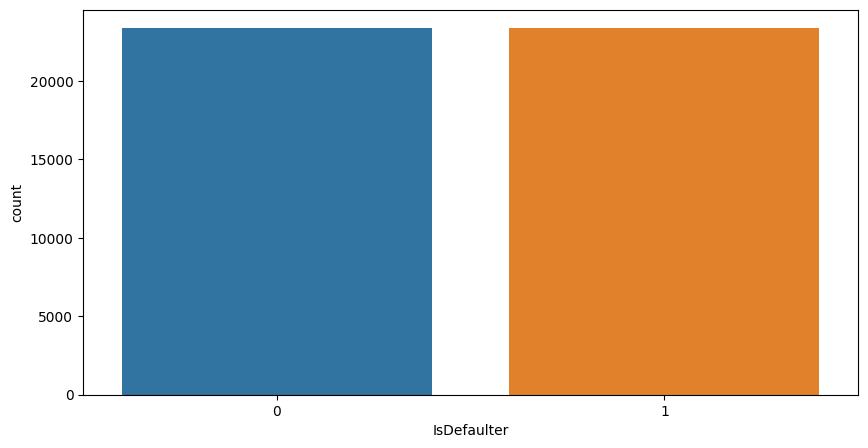

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x = "IsDefaulter",data=balanced_df)
plt.show()

In [24]:
balanced_df.to_csv("Credit_Card_Trainingset.csv",index=False)